IRENA Dataset – Exploratory Data Analysis
- What the data looks like  
- Missing values  
- Data types  
- Basic statistics  
- Outliers  
- Renewable energy trends  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

In [ ]:
#Load the Data
df = pd.read_csv("../data/cleaned/irena_countries.csv")
df.head()

In [5]:
#Dataset Size
df.shape

(91743, 17)

15000, 17

In [6]:
#Dataset Info (Types + Missing)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91743 entries, 0 to 91742
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   region                                         91743 non-null  object 
 1   sub-region                                     91743 non-null  object 
 2   country                                        91743 non-null  object 
 3   iso3_code                                      91743 non-null  object 
 4   m49_code                                       91743 non-null  int64  
 5   re_or_non-re                                   91743 non-null  object 
 6   group_technology                               91743 non-null  object 
 7   technology                                     91743 non-null  object 
 8   sub-technology                                 91743 non-null  object 
 9   producer_type                                  917

In [7]:
#Basic Statistics
df.describe()

,m49_code,year,electricity_generation_(gwh),electricity_installed_capacity_(mw),heat_generation_(tj),public_flows_(2022_usd_m),sdg_7a1_intl._public_flows_(2022_usd_m),sdg_7b1_re_capacity_per_capita_(w/inhabitant)
count,91743.000000,91743.000000,3.708400e+04,3.838700e+04,1.116800e+04,91743.000000,91743.000000,32112.000000
mean,1229.715793,2012.624527,1.448429e+04,3.787969e+03,2.951583e+04,6.075962,2.398123,50.632276
std,8873.999102,6.969479,1.169155e+05,2.798736e+04,2.131821e+05,90.400657,38.383995,279.423188
min,4.000000,2000.000000,-5.874050e+02,1.000000e-03,3.100000e-02,0.000000,0.000000,0.000000
25%,208.000000,2007.000000,1.160750e+01,5.200000e+00,1.440000e+02,0.000000,0.000000,0.000000
50%,417.000000,2013.000000,2.042565e+02,6.900000e+01,1.380500e+03,0.000000,0.000000,0.000000
75%,643.000000,2019.000000,2.413088e+03,7.907000e+02,7.496750e+03,0.000000,0.000000,5.862704
max,99909.000000,2024.000000,5.579300e+06,1.247045e+06,5.244964e+06,9793.438766,4868.980000,6300.744570


In [9]:
#Missing Values
df.isna().sum()
missing_count = df.isna().sum()
missing_percent = (df.isna().mean() * 100).round(2)

# Combine Series into one DataFrame side by side
missing_info = pd.concat([missing_count, missing_percent], axis=1)
missing_info.columns = ['Missing_Count', 'Missing_Percent']
print(missing_info)

                                               Missing_Count  Missing_Percent
region                                                     0             0.00
sub-region                                                 0             0.00
country                                                    0             0.00
iso3_code                                                  0             0.00
m49_code                                                   0             0.00
re_or_non-re                                               0             0.00
group_technology                                           0             0.00
technology                                                 0             0.00
sub-technology                                             0             0.00
producer_type                                              0             0.00
year                                                       0             0.00
electricity_generation_(gwh)                           54659    

In [ ]:
#Missing Data Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
# Check for Duplicate Rows
df.duplicated().sum()

np.int64(0)

In [12]:
#Numeric and Categorical Columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
#numeric_cols, categorical_cols
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
print("Number of numeric columns:", len(numeric_cols))
print("Number of categorical columns:", len(categorical_cols))

Numeric columns: Index(['m49_code', 'year', 'electricity_generation_(gwh)',
       'electricity_installed_capacity_(mw)', 'heat_generation_(tj)',
       'public_flows_(2022_usd_m)', 'sdg_7a1_intl._public_flows_(2022_usd_m)',
       'sdg_7b1_re_capacity_per_capita_(w/inhabitant)'],
      dtype='object')
Categorical columns: Index(['region', 'sub-region', 'country', 'iso3_code', 're_or_non-re',
       'group_technology', 'technology', 'sub-technology', 'producer_type'],
      dtype='object')
Number of numeric columns: 8
Number of categorical columns: 9


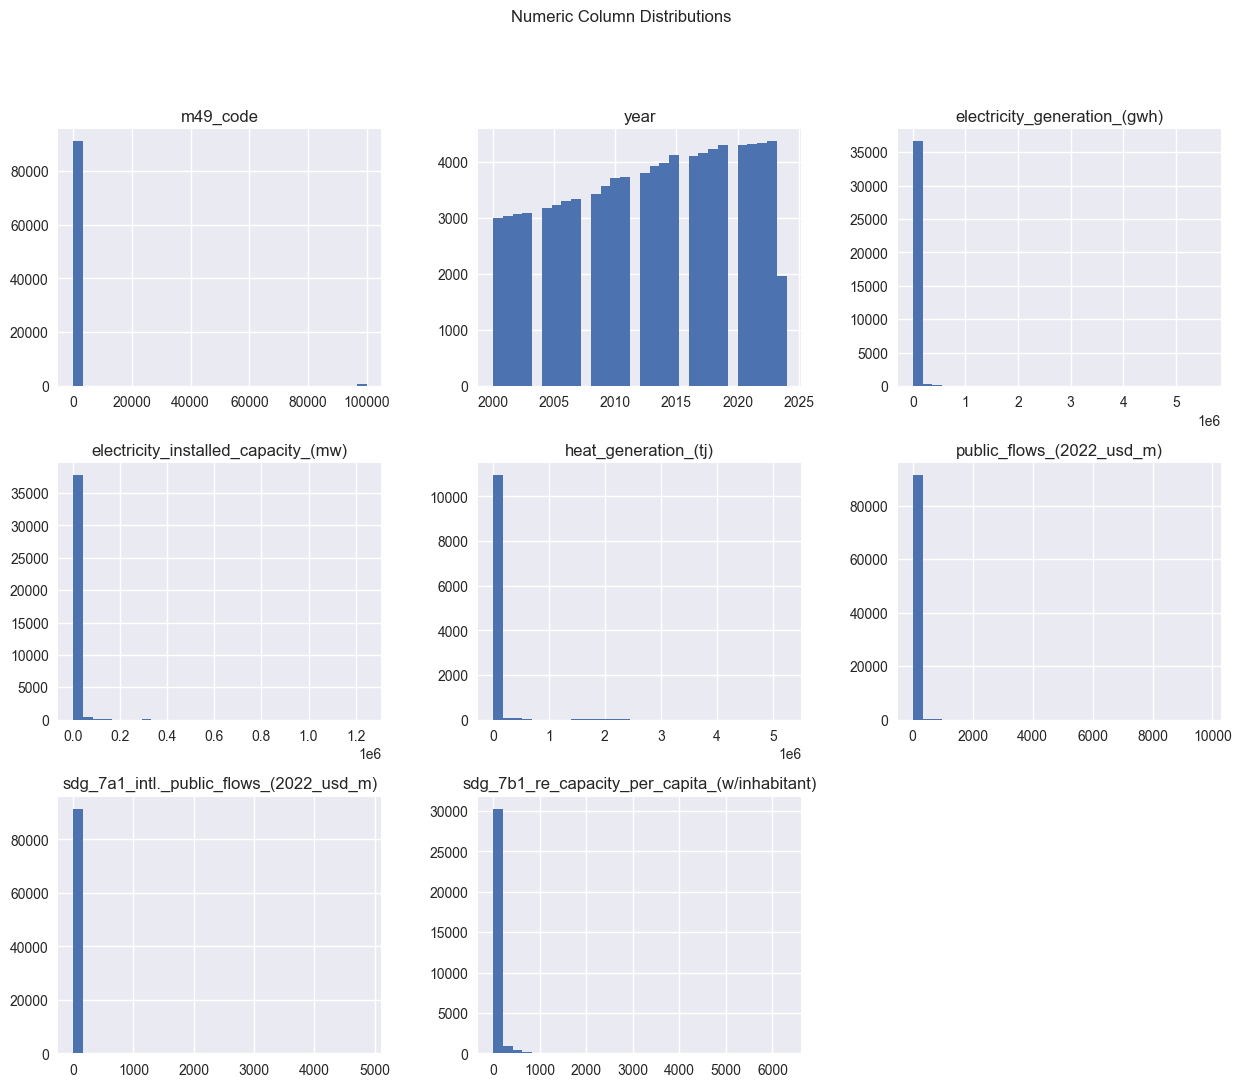

In [13]:
#Numeric Distributions
df[numeric_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Numeric Column Distributions")
plt.show()

<Figure size 1500x1000 with 0 Axes>

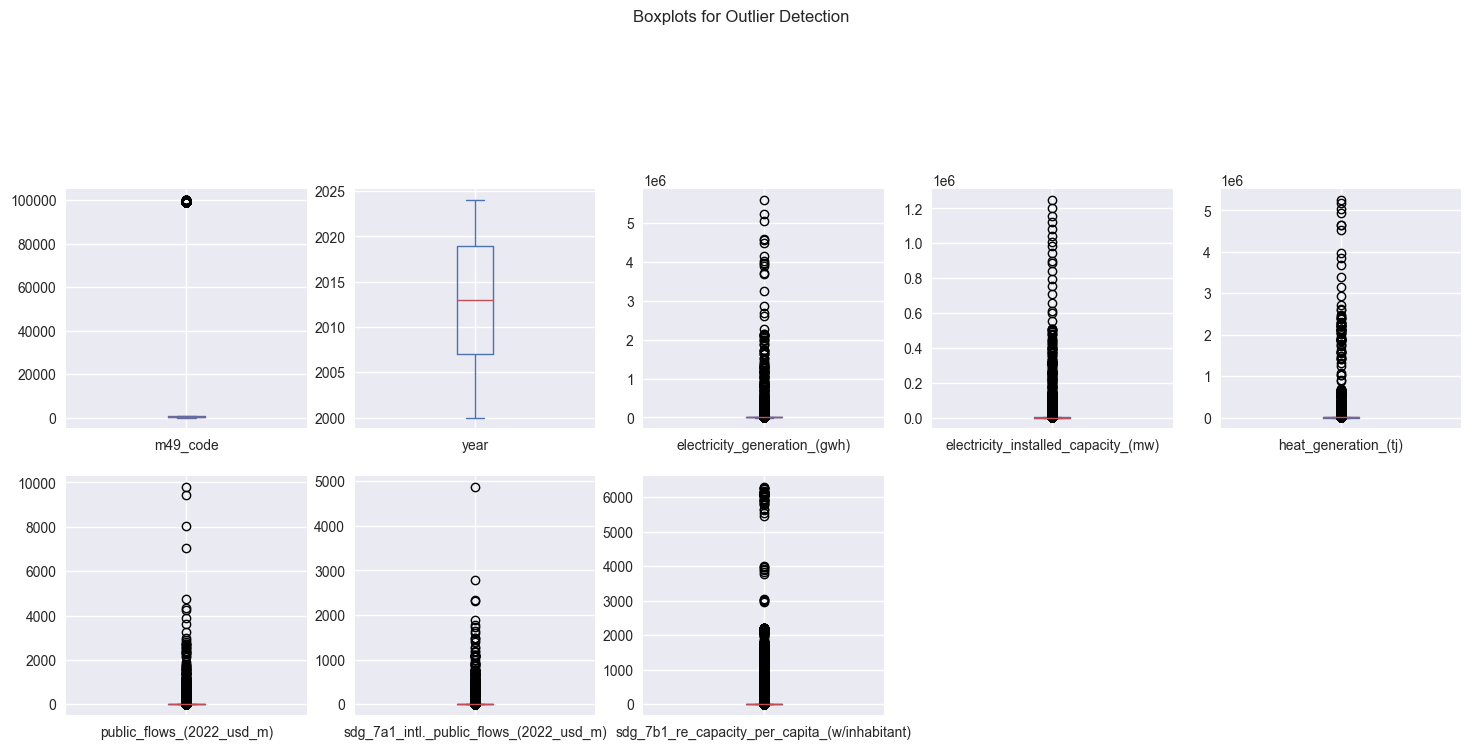

In [14]:
# Boxplots to Detect Outliers
plt.figure(figsize=(15,10))
df[numeric_cols].plot(kind='box', subplots=True, layout=(5,5), figsize=(18,18))
plt.suptitle("Boxplots for Outlier Detection")
plt.show()

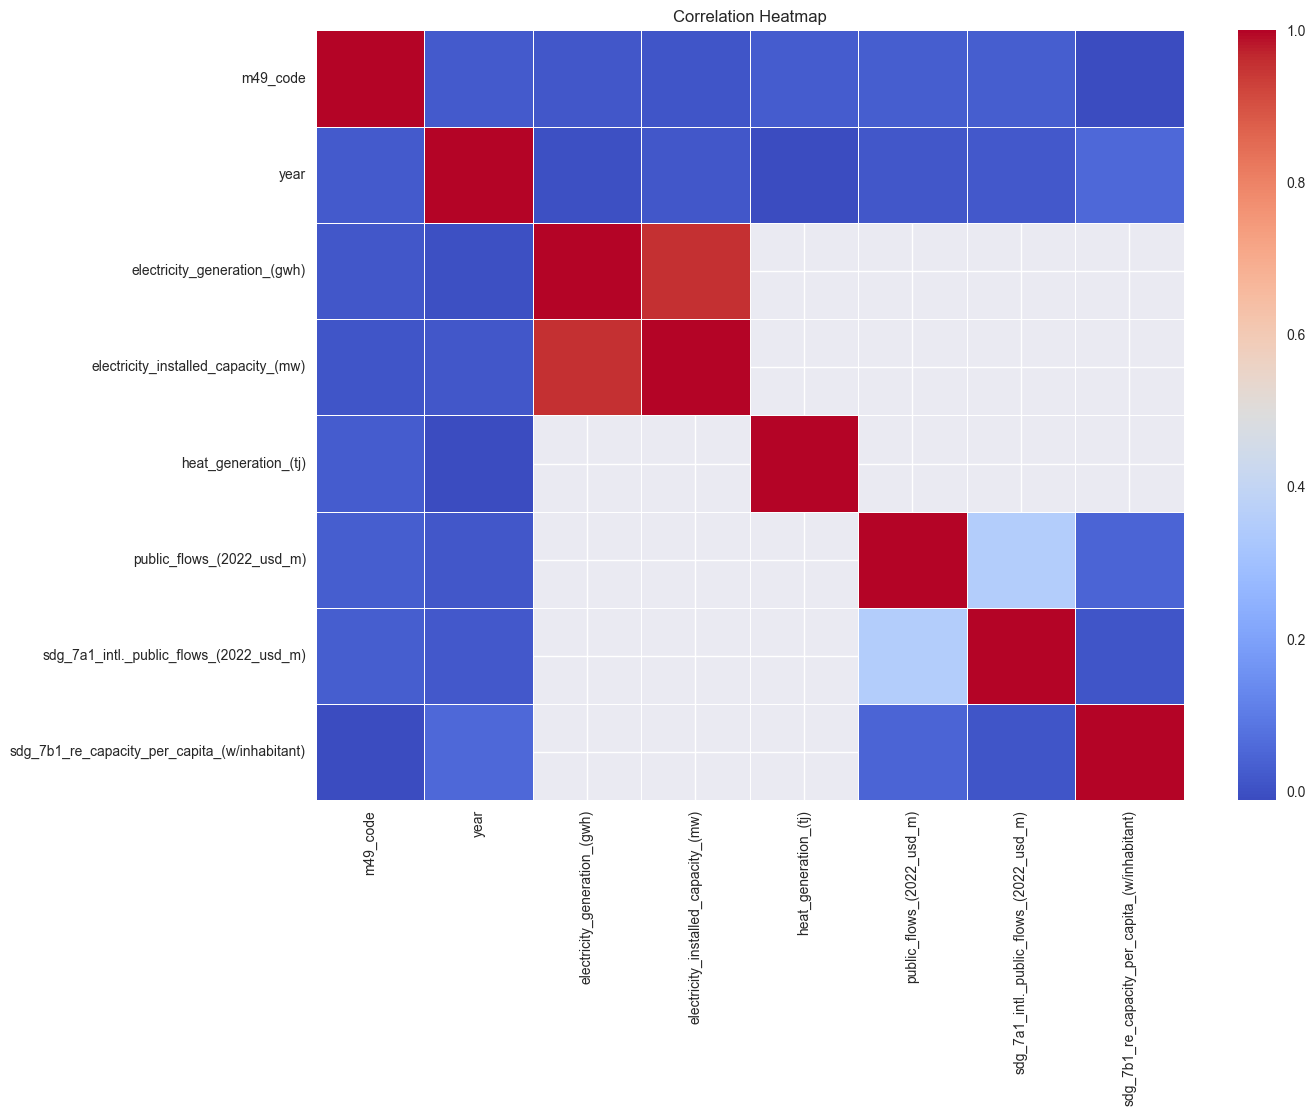

In [15]:
#Correlation Between Numeric Columns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


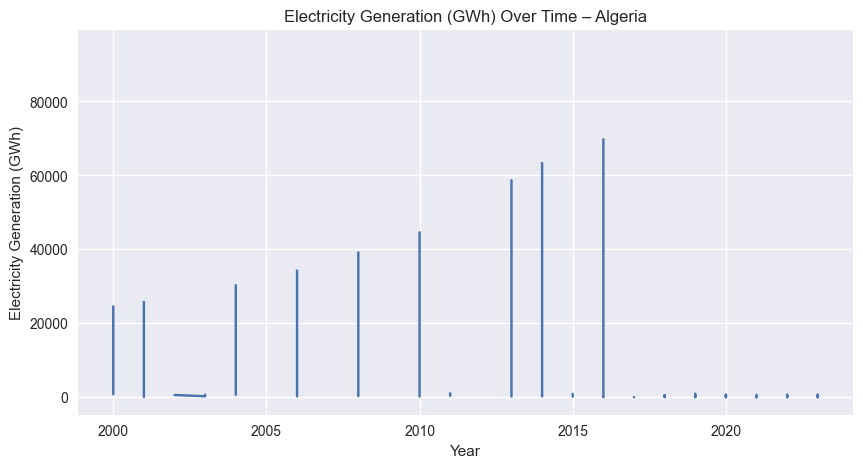

In [20]:
#Renewable Energy Trend Example: Algeria
df_alg = df[df['country'] == "Algeria"].sort_values('year')

plt.figure(figsize=(10,5))
plt.plot(df_alg['year'], df_alg['electricity_generation_(gwh)'])
plt.title("Electricity Generation (GWh) Over Time – Algeria")
plt.xlabel("Year")
plt.ylabel("Electricity Generation (GWh)")
plt.show()


In [22]:
#Log Transform Skewed Column
df['Electricity_GWh_log'] = np.log1p(df['electricity_generation_(gwh)'])

c:\Users\Code Lou\Documents\projects\global_energy_analysis\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
#Categorical EDA
# Select categorical columns
cat_cols = ['region', 'sub-region', 'country', 'iso3_code', 're_or_non-re',
            'group_technology', 'technology', 'sub-technology', 'producer_type']

print("### Categorical EDA ###\n")

# Summary Table
summary_list = []

for col in cat_cols:
    summary_list.append({
        "Column": col,
        "Unique Values": df[col].nunique(),
        "Most Common Value": df[col].mode()[0],
        "Missing Count": df[col].isna().sum()
    })

cat_summary = pd.DataFrame(summary_list)
display(cat_summary)

### Categorical EDA ###



,Column,Unique Values,Most Common Value,Missing Count
0,region,7,Europe,0
1,sub-region,21,Latin America and the Caribbean,0
2,country,235,Sweden,0
3,iso3_code,235,SWE,0
4,re_or_non-re,2,Total Renewable,0
5,group_technology,12,Bioenergy,0
6,technology,23,Solid biofuels,0
7,sub-technology,47,Renewable hydropower,0
8,producer_type,5,All types,0


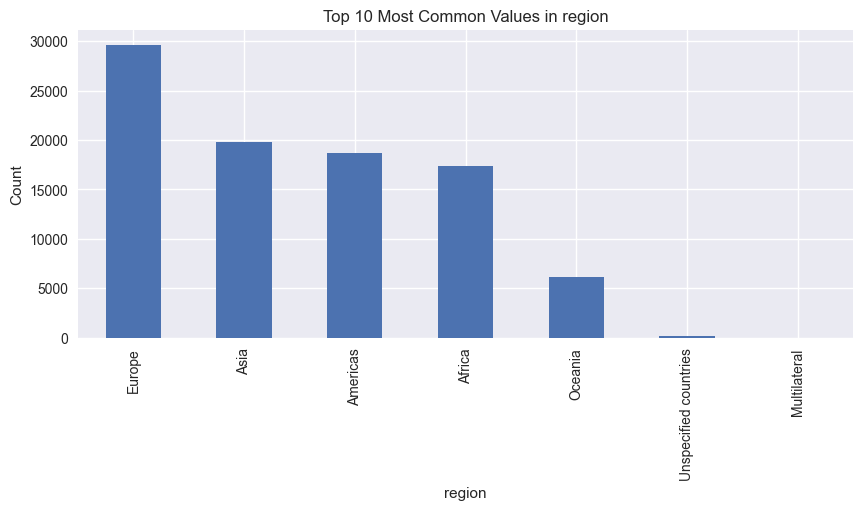

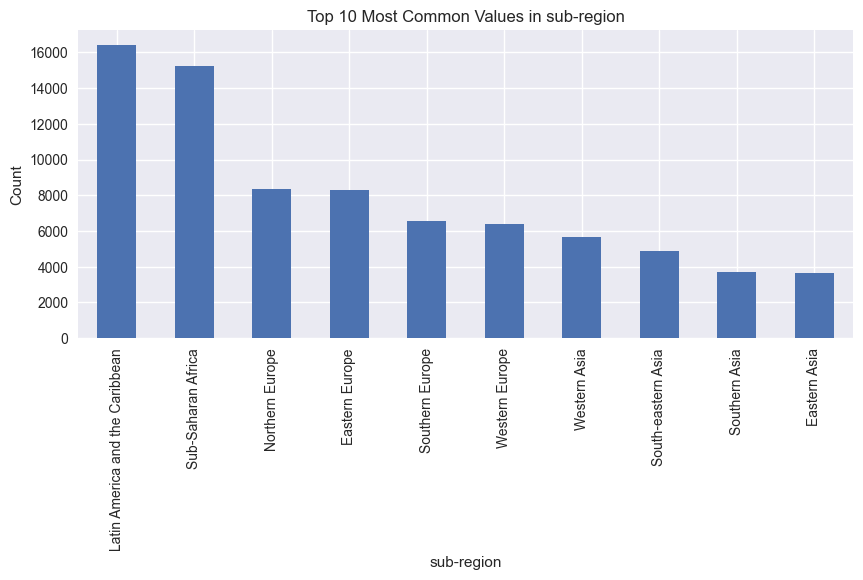

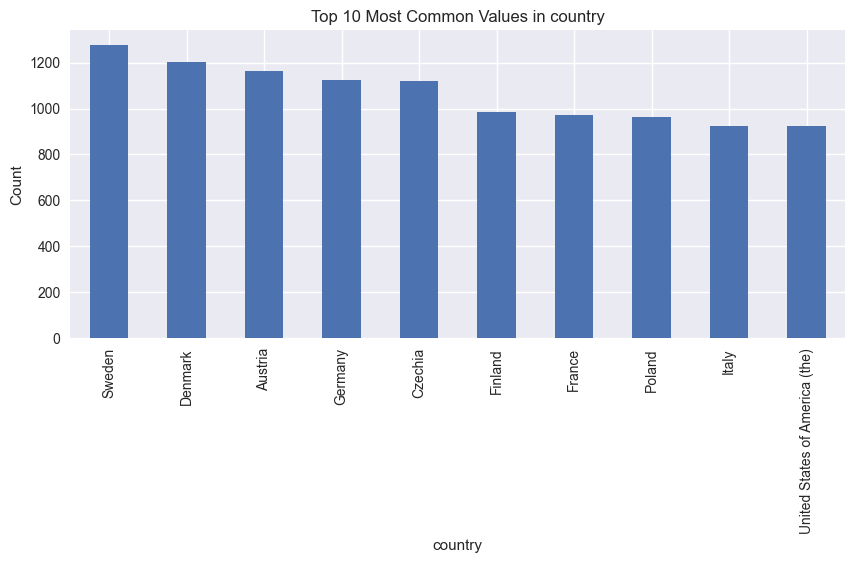

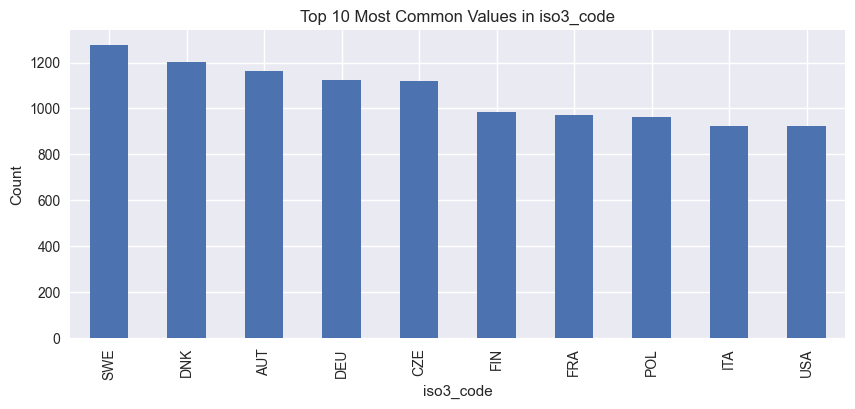

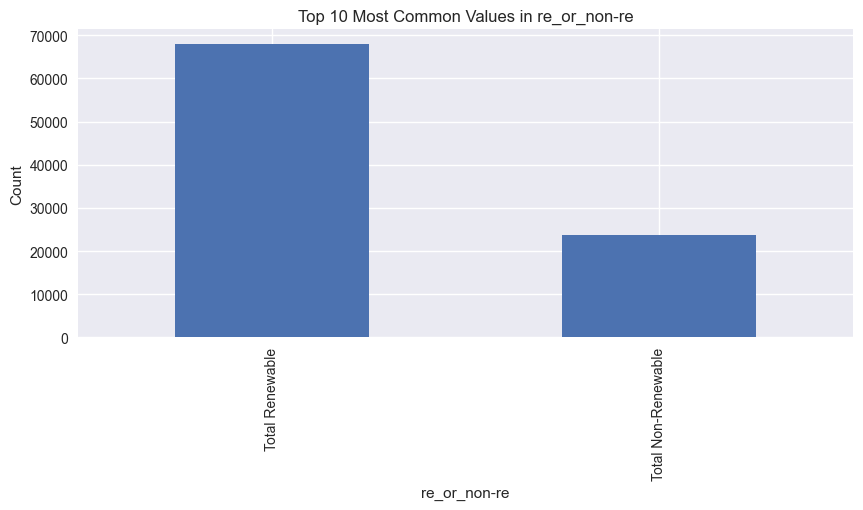

In [24]:
#Frequency Plots for Categorical Columns
for col in cat_cols[:5]:  # only first 5 to avoid too many plots
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 Most Common Values in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [ ]:
#pd.crosstab(df['region'], df['group_technology']).head()